23b2289
## Objectives:
- Pridicting sales values of customers based on the selling price
- To find the best model for the prediction
- To check if the model is well behaved using metrics
- Check the peculier beaviour of prcing in city of class A
- Classify the customers whether they will return or not based on the sales values and selling price
- Evaluate the classification model using metrics


## Solution:
- The solution is divided into 4 parts
    - Data Preprocessing
    - Data Visualization
    - Model Building
    - Model Evaluation
- The data is preprocessed by checking for missing values and removing them
- The data is visualized using matplotlib for manual analysis
- I saw that the data is not linear at some portion and hence i classified it first and then used linear regression for the rest of the data, and polynomial regression for the non linear data


## Outline:
1. Data Preprocessing:
    - Load the data
    - Check for missing values
    - Check for duplicates
    - Check for data types
    - Check for unique values
2. Feature Engineering:
    - Create new features
    - Drop unnecessary columns

## Data Preprocessing:
- Looking for empty values
- Looking for data types
- Checking for no of classes in Retuned column

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('fitco.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         1000 non-null   float64
 1   SellingPrice  1000 non-null   float64
 2   Returned      1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [39]:
data.describe()

,Sales,SellingPrice,Returned
count,1000.000000,1000.000000,1000.000000
mean,7876.227000,110.565500,0.113000
std,1975.587319,25.600749,0.316751
min,4511.500000,50.500000,0.000000
25%,6017.125000,96.000000,0.000000
50%,7642.000000,114.000000,0.000000
75%,9926.750000,132.000000,0.000000
max,10536.000000,150.000000,1.000000


In [40]:
data['Returned'].unique()

array([0, 1], dtype=int64)

Conclusions: 
- No missing values
- All columns are of type float, except for Returned column
- Returned column has 2 classes

## Visualizations:

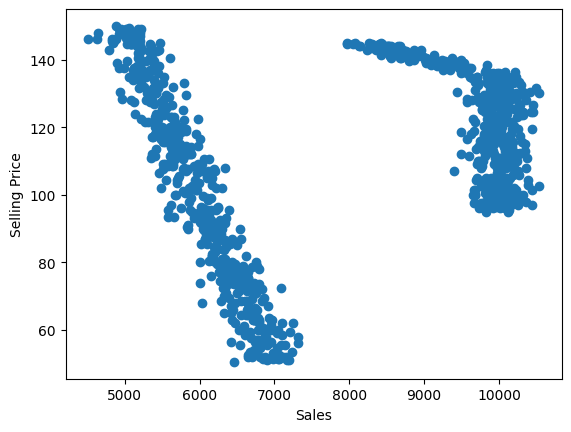

In [41]:
plt.scatter(data['Sales'], data['SellingPrice'])
plt.xlabel('Sales')
plt.ylabel('Selling Price')
plt.show()

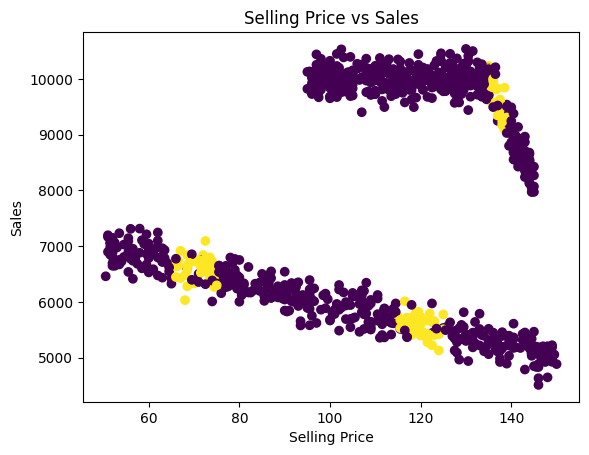

In [42]:

plt.scatter(data['SellingPrice'], data['Sales'], c=data['Returned'])
plt.xlabel('Selling Price')
plt.ylabel('Sales')
plt.title('Selling Price vs Sales')
plt.show()

Conclusions:
- We can clearly see in First plot that where exactly did they company did pricing for Class A cities
- While the remaining behaviour follows usual demand curve.
- The second plot shows that the company has a good return policy, as the returns are not very high.


## Model Building:

### Clustering

Let's Classify the data in plot one in two classes and then predict the sales value for the given SellingPrice. 


In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[['SellingPrice', 'Sales']])
data['Cluster'] = kmeans.labels_
data.head()


,Sales,SellingPrice,Returned,Cluster
0,6186.0,88.5,0,1
1,5392.0,134.0,0,1
2,5064.0,144.5,0,1
3,10081.0,132.0,0,0
4,10053.5,135.5,1,0


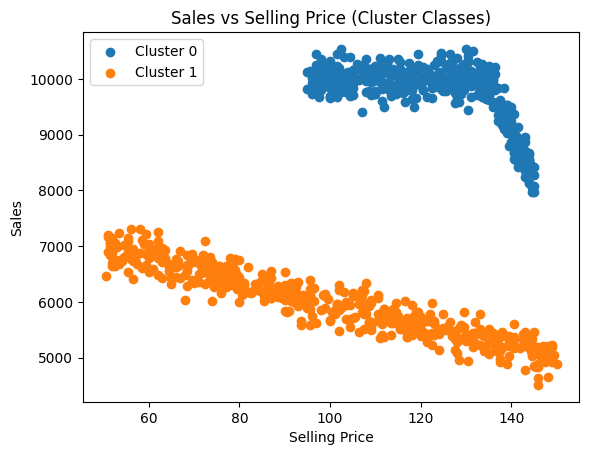

In [44]:
plt.scatter(data[data['Cluster'] == 0]['SellingPrice'], data[data['Cluster'] == 0]['Sales'], label='Cluster 0')
plt.scatter(data[data['Cluster'] == 1]['SellingPrice'], data[data['Cluster'] == 1]['Sales'], label='Cluster 1')
plt.xlabel('Selling Price')
plt.ylabel('Sales')
plt.title('Sales vs Selling Price (Cluster Classes)')
plt.legend()
plt.show()


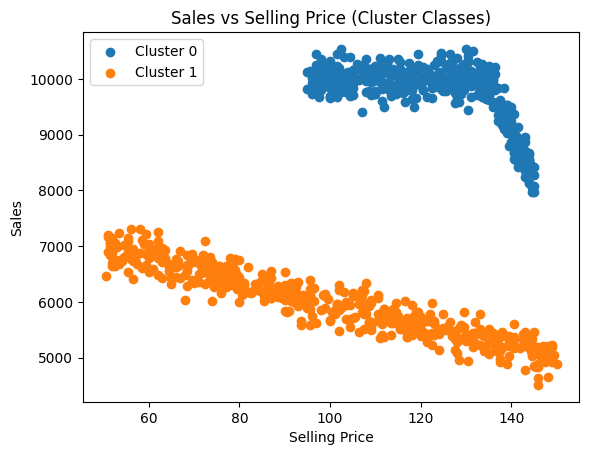

Silhouette Score: 0.8235298747702531
Calinski-Harabasz Score: 10812.304727043867
Davies-Bouldin Score: 0.24136805409604917


In [45]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

plt.scatter(data[data['Cluster'] == 0]['SellingPrice'], data[data['Cluster'] == 0]['Sales'], label='Cluster 0')
plt.scatter(data[data['Cluster'] == 1]['SellingPrice'], data[data['Cluster'] == 1]['Sales'], label='Cluster 1')
plt.xlabel('Selling Price')
plt.ylabel('Sales')
plt.title('Sales vs Selling Price (Cluster Classes)')
plt.legend()
plt.show()
# Evaluate clustering algorithm performance
silhouette_score_value = silhouette_score(data[['SellingPrice', 'Sales']], data['Cluster'])
calinski_harabasz_score_value = calinski_harabasz_score(data[['SellingPrice', 'Sales']], data['Cluster'])
davies_bouldin_score_value = davies_bouldin_score(data[['SellingPrice', 'Sales']], data['Cluster'])

# Print the scores
print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

We can see beautiful seperation int the data when we classify it in two classes using Kmeeans clustering.

Lets sperated the data now, and then build a model to predict the sales value for the given SellingPrice. and also evaluate it using statsmodels.

### Linear Regression

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     4335.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          6.61e-248
Time:                        09:28:30   Log-Likelihood:                -3351.1
No. Observations:                 500   AIC:                             6706.
Df Residuals:                     498   BIC:                             6715.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7974.1012     31.449    253.559   

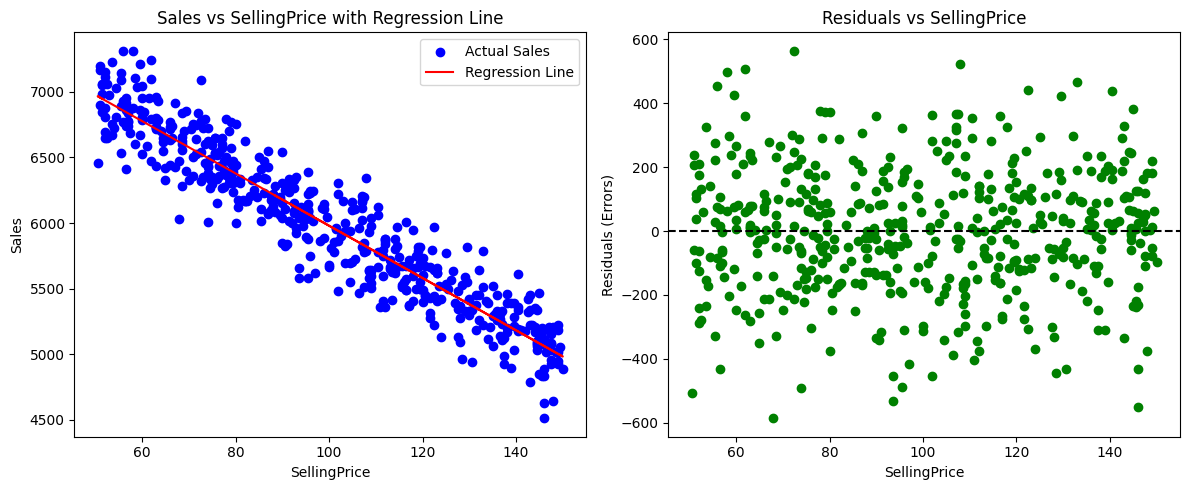

In [50]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the DataFrame for rows belonging to cluster 1
cluster_1_data = data[data['Cluster'] == 1]

# Step 2: Using sklearn's LinearRegression
# Create an instance of LinearRegression
linear_regression = LinearRegression()

# Fit the linear regression model using the filtered data
linear_regression.fit(cluster_1_data[['SellingPrice']], cluster_1_data['Sales'])

# Predict the sales values for the filtered data
predicted_sales = linear_regression.predict(cluster_1_data[['SellingPrice']])

# Step 3: Using statsmodels' OLS regression
# Add a constant (intercept term) to the data for the OLS model
X = sm.add_constant(cluster_1_data[['SellingPrice']])

# Create the linear regression model using OLS
model = sm.OLS(cluster_1_data['Sales'], X)

# Fit the OLS model
results = model.fit()

# Step 4: Generate the summary table with model metrics
metrics_table = results.summary()

# Output the metrics table
print(metrics_table)

# Step 5: Plotting the regression line and residuals

# Plot 1: Scatter plot with regression line
plt.figure(figsize=(12, 5))

# Scatter plot of actual data points
plt.subplot(1, 2, 1)
plt.scatter(cluster_1_data['SellingPrice'], cluster_1_data['Sales'], color='blue', label='Actual Sales')
# Plot the regression line
plt.plot(cluster_1_data['SellingPrice'], predicted_sales, color='red', label='Regression Line')
plt.title('Sales vs SellingPrice with Regression Line')
plt.xlabel('SellingPrice')
plt.ylabel('Sales')
plt.legend()

# Plot 2: Residuals (errors) vs SellingPrice
plt.subplot(1, 2, 2)
residuals = cluster_1_data['Sales'] - predicted_sales
plt.scatter(cluster_1_data['SellingPrice'], residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs SellingPrice')
plt.xlabel('SellingPrice')
plt.ylabel('Residuals (Errors)')

plt.tight_layout()
plt.show()


Conclusions on fitting Linear regression model: 
-The model is well behaved that can be verified by these values:
     - R-squared: 0.897 which shows that 89.7% of the variance in the dependent variable can be explained by the independent variables.
     - A very high F-statistic (4335) with a corresponding p-value of nearly zero (6.61e-248) strongly suggests that the relationship between SellingPrice and Sales is highly significant
     - The p-values for the coefficients are all nearly zero, which indicates that the coefficients are significant.
-Residuals:
     - error vs selling price plot shows that the residuals are randomly distributed around zero, which is a good sign.
     - Durbin-watson value is 1.878 which is close to 2, indicating that there is no autocorrelation in the residuals.
- So OLS model is a good fit for the data, error is normally distributed and there is no autocorrelation in the residuals.

### Polynomial Regression

Let's now find the model for city class A 

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


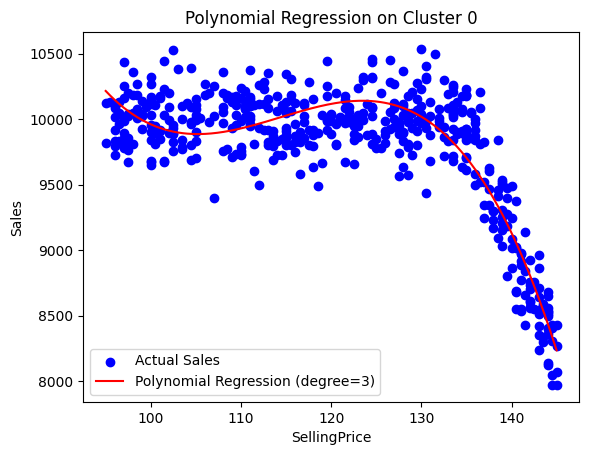

R-squared: 0.8165549734499364
Mean Absolute Error (MAE): 185.39874504615028
Root Mean Squared Error (RMSE): 227.2054382993027
Durbin-Watson Statistic: 2.0786419524396056
Jarque-Bera Statistic: 3.168579549317945, p-value: 0.2050934039351823


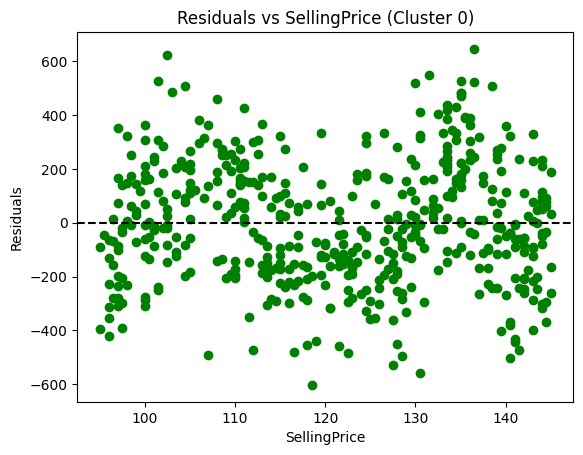

R-squared: 0.8165549734499364
Mean Absolute Error (MAE): 185.39874504615028
Root Mean Squared Error (RMSE): 227.2054382993027


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Step 1: Filter the DataFrame for Cluster 0
cluster_0_data = data[data['Cluster'] == 0]



# Step 2: Extract SellingPrice and Sales
X = cluster_0_data[['SellingPrice']]
y = cluster_0_data['Sales']

# Step 3: Apply Polynomial Features (degree=3)
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Step 4: Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# Step 5: Make predictions for the actual data points
y_pred = model.predict(X_poly)

# Step 6: Generate smooth predictions by creating a sequence of selling prices
X_range = np.linspace(X.min(), X.max(), 300)  # Generate 300 evenly spaced values between min and max of SellingPrice
X_range_poly = poly.transform(X_range)  # Transform this range into polynomial features

# Predict sales for the smooth selling price range
y_range_pred = model.predict(X_range_poly)

# Step 7: Plot actual data points and smooth polynomial regression line
plt.scatter(X, y, color='blue', label='Actual Sales')
plt.plot(X_range, y_range_pred, color='red', label=f'Polynomial Regression (degree={degree})')
plt.title('Polynomial Regression on Cluster 0')
plt.xlabel('SellingPrice')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 8: Evaluate the model using R-squared, MAE, and RMSE
r_squared = model.score(X_poly, y)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'R-squared: {r_squared}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
import statsmodels.api as sm
from scipy.stats import jarque_bera
from statsmodels.stats.stattools import durbin_watson

# Step 1: Residuals from the polynomial model
residuals = y - y_pred

# Step 2: Durbin-Watson Test for autocorrelation
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat}')

# Step 3: Jarque-Bera Test for normality of residuals
jb_stat, jb_p_value = jarque_bera(residuals)
print(f'Jarque-Bera Statistic: {jb_stat}, p-value: {jb_p_value}')

# Step 4: Plot residuals
plt.scatter(X, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs SellingPrice (Cluster 0)')
plt.xlabel('SellingPrice')
plt.ylabel('Residuals')
plt.show()

# Step 5: Display full model evaluation
r_squared = model.score(X_poly, y)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'R-squared: {r_squared}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')



Conclusions on fitting Polynomial regression model for city class A:
- The model is well behaved that can be verified by these values:
    - R-squared: 0.817 which shows that 81.7% of the variance in the dependent variable can be explained by the independent variables.
    - Durbin-Watson Statistic: 2.0786419524396056, which is close to 2, indicating that there is no autocorrelation in the residuals.
    - Jarque-Bera Statistic: 3.168579549317945, p-value: 0.2050934039351823, which indicates that the residuals are normally distributed.
- The model is a good fit for the data, error is normally distributed and there is no autocorrelation in the residuals.



### Classification

Accuracy: 0.9433333333333334
Precision: 0.7
Recall: 0.7241379310344828
F1-Score: 0.711864406779661
Matthews Correlation Coefficient: 0.6805713705369875
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       271
           1       0.70      0.72      0.71        29

    accuracy                           0.94       300
   macro avg       0.84      0.85      0.84       300
weighted avg       0.94      0.94      0.94       300



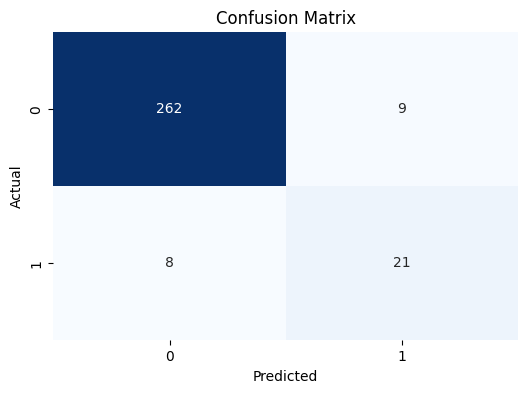

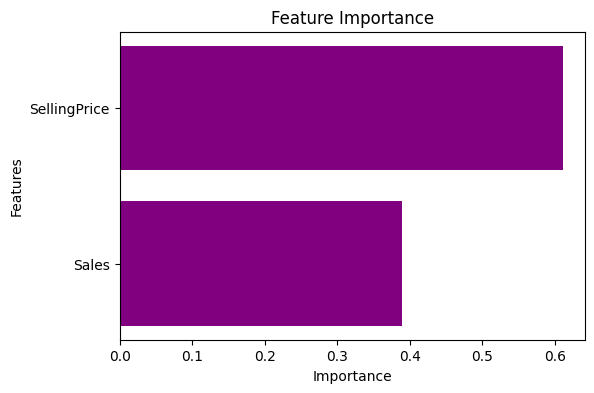

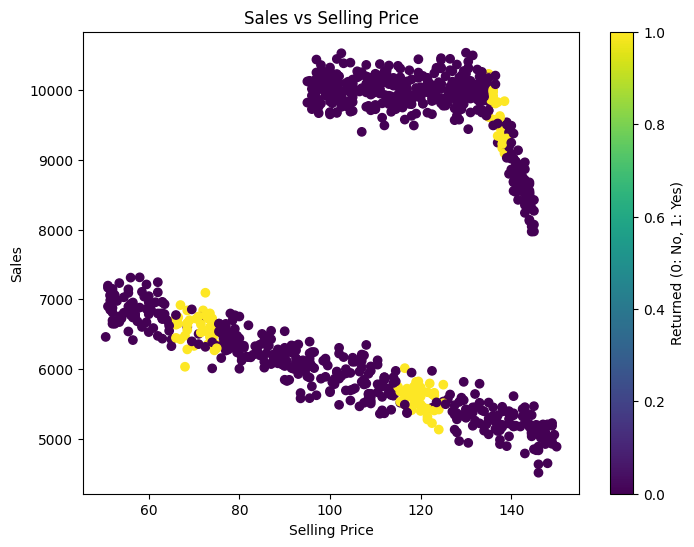

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef

# Split the data into features and target variable
X = data[['Sales', 'SellingPrice']]
y = data['Returned']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Compute various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
mcc = matthews_corrcoef(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Classification Report:\n{class_report}")

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance plot
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
plt.barh(features, feature_importances, color='purple')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Visualizing the distribution of sales vs selling price with respect to 'Returned'
plt.figure(figsize=(8, 6))
plt.scatter(X['SellingPrice'], X['Sales'], c=y, cmap='viridis')
plt.title('Sales vs Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Sales')
plt.colorbar(label='Returned (0: No, 1: Yes)')
plt.show()


Conclusion:
- We can see that selling price is more important in predicting the returns
- The model is well behaved that can be verified by these values:
     - F1-score: 0.711864406779661 , which is a good score
     - Matthews correlation coefficient: 0.6805713705369875, which is close to 1, indicating a strong correlation between the predicted and actual values.
     - The confusion matrix shows that the model is able to predict the returns and non-returns well.

## Prediction

### Regression

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


          Sales  SellingPrice
0   6777.587066            60
1   6677.877556            65
2   6578.168046            70
3   6478.458536            75
4   6378.749026            80
5   6279.039516            85
6   6179.330006            90
7   6079.620496            95
8   5979.910986           100
9   5880.201476           105
10  5780.491966           110
11  5680.782456           115
12  5581.072945           120
13  5481.363435           125
14  5381.653925           130
15  5281.944415           135
16  5182.234905           140
17  5082.525395           145
18  4982.815885           150


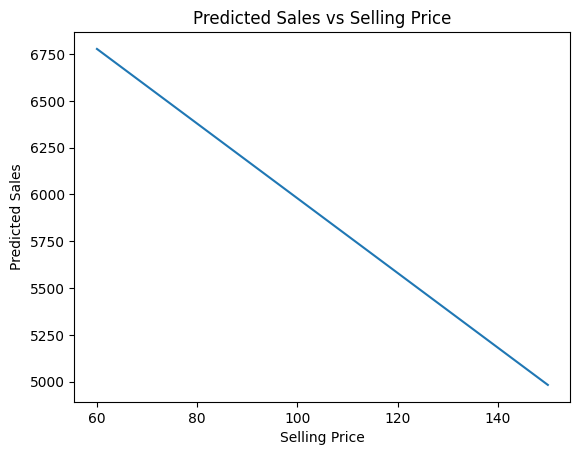

In [75]:
selling_prices = np.arange(60, 151, 5)
predicted_sales = linear_regression.predict(selling_prices.reshape(-1, 1))
predicted_sales_table = pd.DataFrame({'Sales': predicted_sales, 'SellingPrice': selling_prices})
print(predicted_sales_table)
plt.plot(selling_prices, predicted_sales)
plt.xlabel('Selling Price')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales vs Selling Price')
plt.show()


### Classification

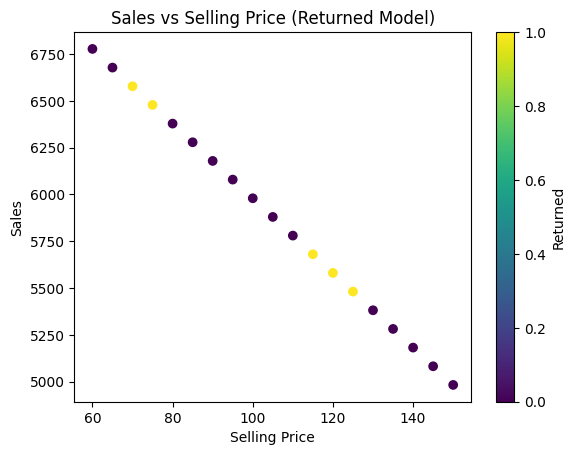

In [82]:
y_pred = rf_model.predict(predicted_sales_table[['Sales', 'SellingPrice']])
plt.scatter(predicted_sales_table['SellingPrice'], predicted_sales_table['Sales'], c=y_pred, cmap='viridis')
plt.title('Sales vs Selling Price (Returned Model)')
plt.xlabel('Selling Price')
plt.ylabel('Sales')
plt.colorbar(label='Returned')
plt.show()